In [ ]:
## importamos algumas bibliotecas que serão usadas
import numpy as np  # Para um mínimo de matemática
import matplotlib.pyplot as plt # Para gráficos

# MAP2321 - EP2: Sistemas lineares


**Nome:** Narayan Shimanoe Lisboa

**Número USP:** 14600141

**Turma:** 02

O objetivo deste EP é implementar e estudar o método de eliminação de Gauss para sistemas lineares. Essa implementação será motivada por um problema prático: determinar as correntes em um circuito elétrico dado.

**Orientações:**
- Salve uma cópia deste notebook para editá-lo.
- Utilize o índice à esquerda para identificar as questões que precisam ser respondidas.
- As respostas das questões deverão ser respondidas nos espaços indicados abaixo.
- Envie o link do seu notebook na página de entrega da atividade no Moodle da disciplina.
- Data limite de entrega:

<font color='red'>
IMPORTANTE: o problema descrito na Parte 1 deste EP depende de um parâmetro $0 < \alpha < 1$. Você deverá usar como $\alpha$ o valor dado pelos dois últimos digitos do seu número USP, dividido por 200. Por exemplo, se seu número USP for 12345678, então você deve usar
$$
\alpha = \frac{78}{200} = 0.39
$$

Complete e rode a célula abaixo indicando seu valor de $\alpha$.
</font>



In [ ]:
alpha = 41/200## COMPLETAR

#Parte 1 - O circuito elétrico

## 1.1. Formulação do problema


**Problema:**
Deseja-se determinar as correntes elétricas em um circuito de resistores, como mostrado na figura.

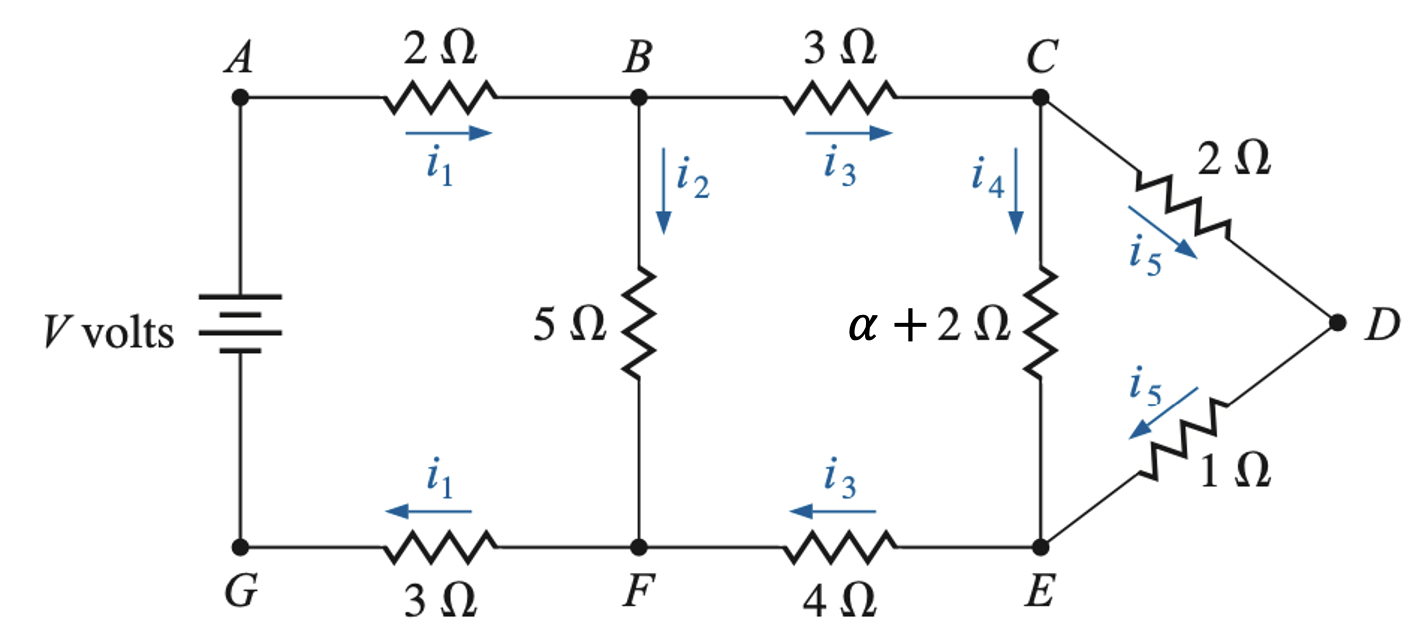

**Modelagem:**
Para equacionar o problema, vamos aplicar as leis de Kirchhoff, garantindo soma nula de correntes nos nós B e C:

$$
i_1 - i_2 - i_3 = 0
$$

$$
i_3 - i_4 - i_5 = 0
$$

Além disso, temos que a queda de tensão no resistor BF deve ser a mesma do conjunto BC+CE+EF, levando a:

$$
5i_2 - 7 i_3 - 2 i_4 = 0
$$

Analogamente, para os resistor CE e o conjunto CD+DE, temos:

$$
(\alpha+2) i_4 - 3 i_5 = 0
$$

Finalmente, temos que a queda de d.d.p. imposta deve ser equilibrada pela queda de tensão no conjunto AB+BF+FG:

$$
5i_1 + 5i_2 = V
$$



**Equacionamento matricial:**

Vamos definir como vetor de incógnitas $\mathbf{x} \in R^5$:

$$
\mathbf{x} = (i_1 , i_2 , i_3 , i_4 , i_5)^T
$$

E o seguinte vetor-forçante $\mathbf{b} \in R^5$

$$
\mathbf{b} = (0 , 0 , 0 , 0 , V)^T = V (0,0,0,0,1)^T
$$

De modo que podemos reescrever as equações apresentadas na forma de um sistema linear:

$$
A \mathbf{x} = \mathbf{b}
$$

Onde a matriz $A\in R^{5\times5}$:

$$
A =  \begin{pmatrix}
1 & -1 & -1 & 0 & 0 \\
0 & 0 & 1 & -1 & -1 \\
0 & 5 & -7 & -2 & 0 \\
0 & 0 & 0 & \alpha+2 & -3 \\
5 & 5 & 0 & 0 & 0 \\
\end{pmatrix}
$$

**Formulação do problema aumentado:**

Vamos reescrever esse sistema na forma $[A,\mathbf{b}] = M \in R^{5,6}$ problema em uma forma que permita a aplicação dos métodos estudados. Podemos escrever a equação (1) como:

$$
M = [A , \mathbf{b}] = \begin{pmatrix}
1 & -1 & -1 & 0 & 0 & 0 \\
0 & 0 & 1 & -1 & -1 & 0 \\
0 & 5 & -7 & -2 & 0 & 0 \\
0 & 0 & 0 & \alpha+2 & -3 & 0 \\
5 & 5 & 0 & 0 & 0 & V \\
\end{pmatrix} =
\begin{pmatrix}
L_1 \\
L_2 \\
L_3 \\
L_4 \\
L_5 \\
\end{pmatrix}
$$

Que corresponde a uma matriz de 5 linhas, cada uma contendo tanto a linha da matriz $A$ e o coeficiente do vetor forçante.

Em seguida, vamos definir, em python, este sistema:



In [ ]:

V = 1. # voltagem aplicada
b = np.transpose([0,0,0,0,V])
A = [[1,-1,-1,0,0],
     [0,0,1,-1,-1],
     [0,5,-7,-2,0],
     [0,0,0,alpha+2,-3],
     [5,5,0,0,0]]


M = np.column_stack((A,b))

(n,m) = M.shape

print("A matriz do sistema é           : \n")
print(str(A))
print("O vetor forçante do sistema é   : \n")
print(str(b))
print("A matriz do sistema aumentado é : \n")
print(str(M))

A matriz do sistema é           : 

[[1, -1, -1, 0, 0], [0, 0, 1, -1, -1], [0, 5, -7, -2, 0], [0, 0, 0, 2.205, -3], [5, 5, 0, 0, 0]]
O vetor forçante do sistema é   : 

[0. 0. 0. 0. 1.]
A matriz do sistema aumentado é : 

[[ 1.    -1.    -1.     0.     0.     0.   ]
 [ 0.     0.     1.    -1.    -1.     0.   ]
 [ 0.     5.    -7.    -2.     0.     0.   ]
 [ 0.     0.     0.     2.205 -3.     0.   ]
 [ 5.     5.     0.     0.     0.     1.   ]]


### Questão 1.1.

O sistema considerado nos fornece as correntes elétricas em cada elemento resistivo do circuito, dada uma d.d.p. $V$. Se este valor de tensão não for precisamente determinado, e se possuirmos alguns valores possiveis para esta quantidade, é necessária a resolução do sistema para diversos termos forçantes, um para cada tensão possível? Qual propriedade matemática do sistema nos ajuda a simplificar este cenário?

**Resposta:** Sabendo que o sistema se trata de um Sistema Linear, as outras soluções para os diversos termos forçantes serão combinações lineares da solução das correntes.


## 1.2. - Resolução por eliminação de Gauss

Seja $A \in R^{n \times n}$ e $\mathbf{b} \in R^{n,k}$. A matrix $\mathbf{b}$ pode ser vista como uma coleção de vários termos forçantes diferentes.

Tal sistema pode ser escrito na forma $M=[A,\mathbf{b}] \in R^{n,m}$ (onde $m=n+k$) e resolvido pelo método da eliminação de Gauss. Este método se propõe a triangularizar a matriz $M$ através de operações elementares de suas linhas. Supondo que esta matriz já possui entradas nulas nas $(p-1)$ colunas inferiores, nos resta, na etapa $p$, anular sua $(p)$ coluna inferior, fazendo:

1. Vamos verificar que $a_{p,p}\neq0$. Se for o caso, vamos trocar a linha $p$ pela próxima linha $q$, tal que $a_{q,q}\neq0$. Questão: o que acontece se esta linha não existir? O que podemos dizer sobre a matriz?
2. Supondo $a_{p,p}\neq0$, calcule os multiplicadores $m_{i,p} = a_{i,p} / a_{p,p}$.
3. Realize as operações elementares nas linhas: $L_{i} \leftarrow L_i - m_{i,p} L_{p}$. Os termos $a_{i,p}$ da nova linha $L_i$ deverão ser zero.
4. Nestes elementos, vamos armazenar $m_{i,p}$
5. Volte ao passo 1.


### Questão 1.2.a
Dada uma matriz $M \in R^{n,m}$ e dois números inteiros $p,q$, implemente uma função que permute as linhas $L_p$ com $L_q$

**Resposta:**


In [ ]:
def permutacao_matrix(M, p, q):
  """
  Permuta as linhas "p" e "q" da matriz "M"

  Entradas:
  - M: Matrix R^{m,n}
  - p,q: indices das linhas a serem permutadas

  Saídas:
  - M_perm: matriz cujas linhas foram permutadas
  """

  Lp = np.copy(M[q,:])
  Lq = np.copy(M[p,:])
  M[p,:] = M[q,:]
  M[q,:] = Lq
  M_perm = np.copy(M)

  return M_perm

### Questão 1.2.b
Dada uma matriz $M \in R^{n,m}$, dois números inteiros $i,p$, e um número $m$, implemente uma função que realize $L_i \leftarrow L_i - m L_p$.

**Resposta:**

In [ ]:
def op_elem_matrix(M, i, p, m):
  """
  Realiza a operação elementar L_i <- L_i - m * L_p

  Entradas:
  - M: Matrix R^{m,n}
  - p: indice da linha usada para anular a linha "L_i" (base)
  - i: Indice da linha ("L_i") cujo  a serem permutadas (alvo)

  Saídas:
  - M_modif: m

  """
  M_modif = np.copy(M)
  Lp = M[p,:]
  Li = M[i,:] - m*Lp
  M_modif[i,:] = Li

  return M_modif

### Questão 1.2.c.
Escreva uma função que realiza a eliminação Gaussiana, conforme o algoritmo apresentado acima.

**Resposta:**

In [ ]:
def el_Gaussiana(M):
  """
  Realiza a eliminação Gaussiana na matriz M "m x n"
  Vamos armazenar tambem os multiplicadores

  Entradas:
  - M: Matrix R^{m,n}

  Saídas:
  - M_modif: matriz triangular (triangulo inferior com multiplicadores)
  """

  (n,m) = M.shape

  # tolerancia para tomarmos um valor como "zero"
  tol = 1.e-8

  for p in range(0,n):

    print(" ")
    print("-----------------------------------------------")
    print("-----------------------------------------------")
    print("Na etapa "+str(p)+" , a matriz M é : ")
    print(str(M))

    # Verificmos se o pivo e nulo. Se sim, realizamos permutacao de linhas
    if abs(M[p,p]) < tol:
      for i in range(1,n-p):
        if abs(M[p+i,p]) > tol:
          permutacao_matrix(M,p,p+i)
          break
      # Vamos trocar a linha com a próxima, tal que seu pivô seja não-nulo


    for q in range(p+1,n):
      m = M[q,p] / M[p,p]
      M_new = op_elem_matrix(M,q,p,m)
      M = np.copy(M_new)

    print(" ")
    print("Na etapa "+str(p)+" , a eliminacao de Gauss resulta em:")
    print(str(M))

  return M

el_Gaussiana(M)


 
-----------------------------------------------
-----------------------------------------------
Na etapa 0 , a matriz M é : 
[[ 1.    -1.    -1.     0.     0.     0.   ]
 [ 0.     0.     1.    -1.    -1.     0.   ]
 [ 0.     5.    -7.    -2.     0.     0.   ]
 [ 0.     0.     0.     2.205 -3.     0.   ]
 [ 5.     5.     0.     0.     0.     1.   ]]
 
Na etapa 0 , a eliminacao de Gauss resulta em:
[[ 1.    -1.    -1.     0.     0.     0.   ]
 [ 0.     0.     1.    -1.    -1.     0.   ]
 [ 0.     5.    -7.    -2.     0.     0.   ]
 [ 0.     0.     0.     2.205 -3.     0.   ]
 [ 0.    10.     5.     0.     0.     1.   ]]
 
-----------------------------------------------
-----------------------------------------------
Na etapa 1 , a matriz M é : 
[[ 1.    -1.    -1.     0.     0.     0.   ]
 [ 0.     0.     1.    -1.    -1.     0.   ]
 [ 0.     5.    -7.    -2.     0.     0.   ]
 [ 0.     0.     0.     2.205 -3.     0.   ]
 [ 0.    10.     5.     0.     0.     1.   ]]
 
Na etapa 1 , a el

array([[ 1.        , -1.        , -1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  5.        , -7.        , -2.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.        , -1.        , -1.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  2.205     , -3.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 50.29251701,
         1.        ]])

### Questão 1.2.d
Escreva uma função que resolve um sistema na forma

$$
U x = d
$$

onde $U$ é uma matriz triangular superior.
Utilize esta função para encontrar a solução do sistema correspondente ao circuito elétrico apresentado.




In [ ]:
def res_triangular_superior(U,d):
  """
  Resolve o sistema, suposto triangular superior, U x = d

  Entradas:
  - U: Matriz R^{n,n}
  - d: Matriz R^{n,k}

  Saídas:
  - x: Matriz de solucao, R^{n,k} (um poara cada coluna em "d")
  """

  x   = np.copy(d)
  rhs = np.copy(x)

  (n,k) = d.shape

  for l in range(0,k):
      for i in range(n-1,-1,-1):
          # vamos calcular o termo forcante (rhs, "right-hand-side")
          rhs = d[i,l]

          # em seguida, vamos calcular a solução
          for j in range(i + 1, n):
            rhs -= U[i, j] * x[j, l]
          x[i, l] = rhs / U[i, i]

  print("A matriz-solucao e: ")
  print(str(x))

  print("Seu residuo (para o sistema Ux=d) é:")
  res = np.copy(x)
  res = np.matmul(U,np.array(x)) - d.reshape(n,1)
  print(str(res))

  return x

## Resolucao do sistema
print(" ")
print(" ")
print(" ")
print(" Eliminacao de Gauss")
print("-----------------------------------------------")
print("-----------------------------------------------")
Ud = el_Gaussiana(M)

print(" Resolucao")
print("-----------------------------------------------")
print("-----------------------------------------------")
U = Ud[0:n,0:n]
d = Ud[0:n,n:m]
x = res_triangular_superior(U,d)

print("Seu residuo (para o sistema Ax=b) é:")
res = np.matmul(A,np.array(x)) - b.reshape(n,1)
print(str(res))

 
 
 
 Eliminacao de Gauss
-----------------------------------------------
-----------------------------------------------
 
-----------------------------------------------
-----------------------------------------------
Na etapa 0 , a matriz M é : 
[[ 1.    -1.    -1.     0.     0.     0.   ]
 [ 0.     0.     1.    -1.    -1.     0.   ]
 [ 0.     5.    -7.    -2.     0.     0.   ]
 [ 0.     0.     0.     2.205 -3.     0.   ]
 [ 5.     5.     0.     0.     0.     1.   ]]
 
Na etapa 0 , a eliminacao de Gauss resulta em:
[[ 1.    -1.    -1.     0.     0.     0.   ]
 [ 0.     0.     1.    -1.    -1.     0.   ]
 [ 0.     5.    -7.    -2.     0.     0.   ]
 [ 0.     0.     0.     2.205 -3.     0.   ]
 [ 0.    10.     5.     0.     0.     1.   ]]
 
-----------------------------------------------
-----------------------------------------------
Na etapa 1 , a matriz M é : 
[[ 1.    -1.    -1.     0.     0.     0.   ]
 [ 0.     0.     1.    -1.    -1.     0.   ]
 [ 0.     5.    -7.    -2.     0

## 1.3. - Resolução por eliminação de Gauss com condensação pivotal (parcial)

Seja $A \in R^{n \times n}$, $\mathbf{b} \in R^{n,k}$ e $M=[A,\mathbf{b}] \in R^{n,m}$, tais como anteriormente. A eliminação Gaussiana, com condensação pivotal, resulta em um metodo bastante similar ao anterior, onde dada uma matriz cujas $(p-1)$ colunas inferiores já foram anuladas, fazemos:

1. (Condensação Pivotal) Vamos identificar nas linhas $q>p$ o maior elemento, em módulo, $|a_{q,p}| \geq |a_{p,p}|, \forall q\geq p$. Em seguida, vamos trocar as linhas $L_q$ e $L_p$.
2. Supondo $a_{p,p}\neq0$, calcule os multiplicadores $m_{i,p} = a_{i,p} / a_{p,p}$.
3. Realize as operações elementares nas linhas: $L_{i} \leftarrow m_{i,p} L_{p}$. Os termos $a_{i,p}$ da nova linha $L_i$ deverão ser zero.
4. Nestes elementos, vamos armazenar $m_{i,p}$
5. Volte ao passo 1.

### Questão 1.3.c
Implemente a eliminação Gaussiana com Condensação Pivotal.

**Resposta:**

In [ ]:
def el_Gaussiana_CP(M):
  """
  Realiza a eliminação Gaussiana, com Condensacao Pivotal (parcial),
  na matriz M "m x n"
  Vamos armazenar tambem os multiplicadores

  Entradas:
  - M: Matrix R^{m,n}

  Saídas:
  - M_modif: matriz triangular (triangulo inferior com multiplicadores)
  """

  (n,m) = M.shape
  M0 = np.copy(M)

  # tolerancia para tomarmos um valor como "zero"
  tol = 1.e-8

  for p in range(0,n):

    print(" ")
    print("-----------------------------------------------")
    print("-----------------------------------------------")
    print("Na etapa "+str(p)+" , a matriz M é : ")
    print(str(M))

    # Trocamos as linhas para que o pivo seja o de maior modulo
    appMax = np.max(np.abs(M[p:n,p]))
    lMax   = np.argmax(np.abs(M[p:n,p])) + p


    M_new = permutacao_matrix(M,p,lMax)
    print(" ")
    print("Na etapa "+str(p)+" , realizamos permutacao das linhas "+str(lMax)+" e "+str(p)+" :")
    #print(str(M_new))
    M = np.copy(M_new)

    for q in range(p+1,n):
      m = M[q,p] / M[p,p]
      M_new = op_elem_matrix(M,q,p,m)
      M = np.copy(M_new)


    print(" ")
    print("Na etapa "+str(p)+" , a eliminacao de Gauss resulta em:")
    print(str(M))

  return M

## Resolucao do sistema
print(" ")
print(" ")
print(" ")
print(" Eliminacao de Gauss (CP)")
print("-----------------------------------------------")
print("-----------------------------------------------")
UdCP = el_Gaussiana_CP(M)

print(" Resolucao")
print("-----------------------------------------------")
print("-----------------------------------------------")
UCP = UdCP[0:n,0:n]
dCP = UdCP[0:n,n:m]
xCP = res_triangular_superior(UCP,dCP)

print("Seu residuo (para o sistema Ax=b) é:")
res = np.copy(xCP)
res = np.matmul(A,xCP) - b.reshape(n,1)
print(str(res))

 
 
 
 Eliminacao de Gauss (CP)
-----------------------------------------------
-----------------------------------------------
 
-----------------------------------------------
-----------------------------------------------
Na etapa 0 , a matriz M é : 
[[ 1.    -1.    -1.     0.     0.     0.   ]
 [ 0.     0.     1.    -1.    -1.     0.   ]
 [ 0.     5.    -7.    -2.     0.     0.   ]
 [ 0.     0.     0.     2.205 -3.     0.   ]
 [ 5.     5.     0.     0.     0.     1.   ]]
 
Na etapa 0 , realizamos permutacao das linhas 4 e 0 :
 
Na etapa 0 , a eliminacao de Gauss resulta em:
[[ 5.     5.     0.     0.     0.     1.   ]
 [ 0.     0.     1.    -1.    -1.     0.   ]
 [ 0.     5.    -7.    -2.     0.     0.   ]
 [ 0.     0.     0.     2.205 -3.     0.   ]
 [ 0.    -2.    -1.     0.     0.    -0.2  ]]
 
-----------------------------------------------
-----------------------------------------------
Na etapa 1 , a matriz M é : 
[[ 5.     5.     0.     0.     0.     1.   ]
 [ 0.     0.    